In [34]:
import pandahouse
import seaborn as sns
import numpy as np
import random
from scipy import stats

In [9]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20220220'}

In [12]:
q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2022-02-06' and '2022-02-12'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

In [15]:
df.groupby('exp_group').count()

,user_id,likes,views,ctr
exp_group,,,,
2,8480,8480,8480,8480
3,8569,8569,8569,8569


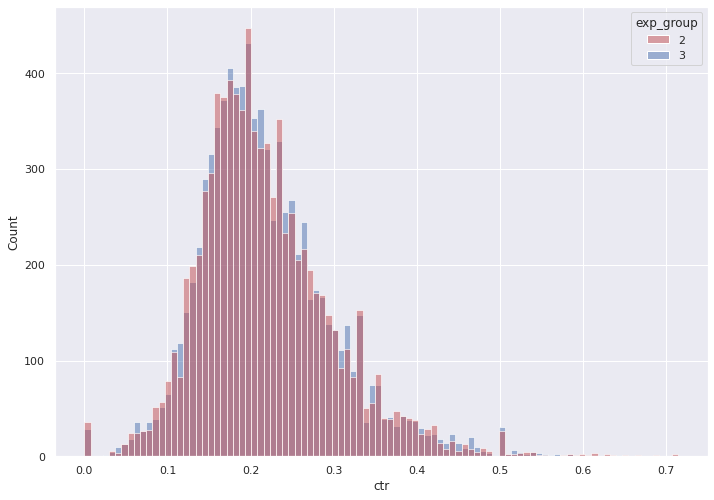

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [42]:
def sample(vector1, vector2):
    choices1 = np.random.choice(vector1, size=500, replace=True)
    choices2 = np.random.choice(vector2, size=500, replace=True)
    Pval = stats.ttest_ind(choices1,
                choices2,
                equal_var=False).pvalue
    mean_test = choices1.mean()
    return Pval, mean_test

In [95]:
Pval = []
for i in range(1,10000+1):
    val = sample(df[df.exp_group == 3].ctr, df[df.exp_group == 2].ctr)
    Pval.append(val)

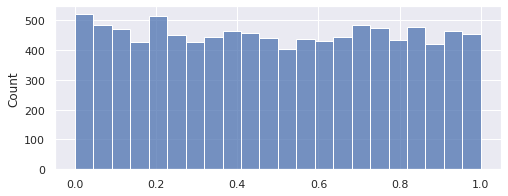

In [96]:
sns.set(rc={'figure.figsize':(8,3)})

groups = sns.histplot(data = Pval)

In [119]:
Percent = len(list(filter(lambda score: score <= 0.05, Pval))) / len(Pval)

print('P-value меньше 0,05: в следующем % случаев ', Percent*100)

P-value меньше 0,05: в следующем % случаев  5.71


#### Проведенный тест подтвердил корректность сплита ->  5% уровень значимости ~ 5% случаев с P-value менее 5%